In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
zero_not_accepted=["Glucose", "BloodPressure", "SkinThickness", "BMI", "Insulin"]
for column in zero_not_accepted:
    df[column]=df[column].replace(0, np.NaN)
    mean=int(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.NaN, mean)

In [6]:
df["Glucose"]

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64

In [8]:
x=df.iloc[:, 0:8]
y=df.iloc[:, 8]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0, test_size=0.25)

In [9]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [11]:
knn=KNeighborsClassifier(n_neighbors=11)

In [12]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [13]:
y_pred=knn.predict(x_test)

In [14]:
cfm=confusion_matrix(y_test, y_pred)
cfm

array([[115,  15],
       [ 25,  37]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual Values')

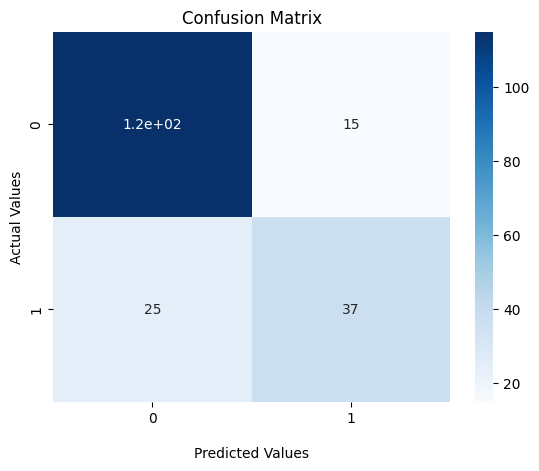

In [15]:
hm=sns.heatmap(cfm, annot=True, cmap='Blues')
hm.set_title('Confusion Matrix')
hm.set_xlabel('\nPredicted Values')
hm.set_ylabel('Actual Values')

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.71      0.60      0.65        62

    accuracy                           0.79       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192



In [18]:
tn, fp, fn, tp=confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(115, 15, 25, 37)

In [19]:
accuracy_score(y_test, y_pred)

0.7916666666666666

In [20]:
precision_score(y_test, y_pred)

0.7115384615384616

In [21]:
recall_score(y_test, y_pred)

0.5967741935483871

In [22]:
error_rate=1-accuracy_score(y_test, y_pred)
error_rate

0.20833333333333337